# Import Dataset from local path

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
medical_df = pd.read_csv('data/insurance.csv')

In [4]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Fetch data from URL

In [5]:
from urllib.request import urlretrieve
insurance_utl = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'
urlretrieve(insurance_utl, 'data/medical_insurance.csv')


('data/medical_insurance.csv', <http.client.HTTPMessage at 0x12b03e210>)

In [6]:
medical_insurance_df = pd.read_csv('data/medical_insurance.csv')

In [7]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [8]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
sns.set_style('darkgrid')  # Set the style of the plot
matplotlib.rcParams['figure.figsize'] = (10, 6) # Set the figure size
matplotlib.rcParams['font.size'] = 14 # Set the font size
matplotlib.rcParams['figure.facecolor'] = '#00000000' # Set the figure background color


In [11]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [12]:
import nbformat
print(nbformat.__version__)


5.10.4


# Age distribution

In [13]:
fig = px.histogram(medical_df, x='age', nbins=47, title='Age Distribution') #nbins is the number of bars in the histogram
fig.update_layout(bargap=0.1) # Update the layout of the plot
fig.show()

In [20]:
fig = px.histogram(medical_df,
                   x='bmi', 
                   marginal='violin', # Add a violin plot on the side
                   color_discrete_sequence=['green'],
                     title='BMI Distribution')
fig.update_layout(bargap=0.1)
fig.show() # it show gausss distribution because most people have normal bmi .

In [23]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='smoker',
                   color_discrete_sequence=['blue', 'red'],
                   title='Annual Medical Charges ')
fig.update_layout(bargap=0.1)
fig.show() # it show that smoker have high charges and ther is power law

In [24]:
fid = px.pie(medical_df,
             names='region',
             title='Distribution of Patients by Region',
             color_discrete_sequence=px.colors.sequential.RdBu)
fid.show()

In [25]:
fid = px.pie(medical_df,
             names='sex',
             title='Distribution of Patients by Sex',
             color_discrete_sequence=px.colors.sequential.RdBu_r)
fid.show()

In [27]:
fig = px.histogram(medical_df,
                   x = 'smoker',
                   color= 'sex',
                   title= 'Smoker'
)
fig.show()


In [31]:
fig = px.scatter(medical_df,
                 x='age',
                 y='charges',
                 color='smoker',
                 opacity=0.6,
                 hover_data=['sex'],
                 title='Age vs Medical Charges')
fig.update_traces(marker_size=5)
fig.show()

In [42]:
fig = px.scatter(medical_df,
                 x='bmi',
                 y='charges',
                 color='smoker',
                 opacity=0.6,
                 hover_data=['sex'],
                 title='BMI vs Medical Charges')
fig.update_traces(marker_size=5)
fig.show()

In [46]:
fig= px.violin(medical_df,
           x = 'children',
           y = 'charges',)
fig.show()

In [47]:
medical_df.charges.corr(medical_df.age) # correlation between charges and age

np.float64(0.29900819333064754)

In [48]:
medical_df.charges.corr(medical_df.bmi) # correlation between charges and bmi

np.float64(0.19834096883362884)

In [49]:
medical_df.charges.corr(medical_df.children) # correlation between charges and children

np.float64(0.0679982268479048)

In [51]:
smoker_values= {'yes':1, 'no':0}
smoker_numeric = medical_df.smoker.map(smoker_values)
smoker_numeric

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [53]:
medical_df.charges.corr(smoker_numeric) # correlation between charges and smoker

np.float64(0.7872514304984772)

In [54]:
# Correlation Cofficent formula = cov(X,Y) / (std(X) * std(Y))
# where cov is covariance and std is standard deviation
covariance = np.cov(medical_df.charges, smoker_numeric)[0][1]
std_charges = np.std(medical_df.charges)
std_smoker = np.std(smoker_numeric)
correlation = covariance / (std_charges * std_smoker)
correlation

np.float64(0.7878402498182218)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [58]:
medical_df.corr(numeric_only=True) # correlation matrix for all numeric columns

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


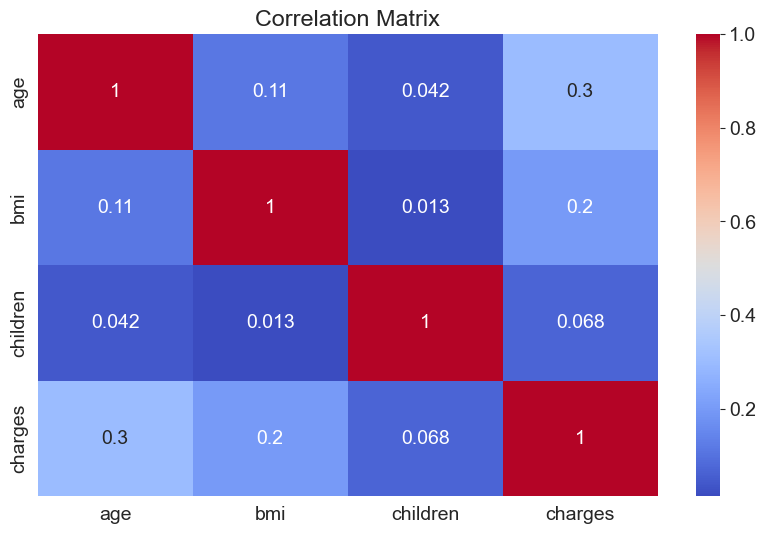

In [60]:
sns.heatmap(medical_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()